In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

# Joining Tables

In [2]:
train_out = pd.read_csv('data/Train_Outpatientdata.csv')
train_in = pd.read_csv('data/Train_Inpatientdata.csv')
train_ben = pd.read_csv('data/Train_Beneficiarydata.csv')
train_label = pd.read_csv('data/Train.csv')

In [3]:
train_out = train_out.merge(train_ben, on='BeneID', how='inner')
train_out = train_out.merge(train_label, on='Provider', how='inner')

In [4]:
train_in = train_in.merge(train_ben, on='BeneID', how='inner')
train_in = train_in.merge(train_label, on='Provider', how='inner')

In [5]:
train_out['Label'] = np.where(train_out['PotentialFraud'] == 'Yes', 1, 0)
train_out.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Label
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,0,0,30,50,Yes,1
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,2,0,0,1810,760,Yes,1
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,2,0,0,1810,760,Yes,1
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,1,2,0,0,1810,760,Yes,1
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,1,1,2,0,0,1810,760,Yes,1


In [6]:
train_in['Label'] = np.where(train_in['PotentialFraud'] == 'Yes', 1, 0)
train_in.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Label
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,2,1,1,36000,3204,60,70,Yes,1
1,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,1,2,2,2,19000,1068,100,20,Yes,1
2,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,1,1,2,2,17000,1068,1050,540,Yes,1
3,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,2,27000,2136,450,160,Yes,1
4,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,...,1,2,2,2,3000,1068,8900,740,Yes,1


In [7]:
train_out['Outpatient'] = 1
train_in['Outpatient'] = 0
full_train = train_out.append(train_in)
full_train

/tmp/ipykernel_385/1655979313.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_train = train_out.append(train_in)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Label,Outpatient,AdmissionDt,DischargeDt,DiagnosisGroupCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,0,0,30,50,Yes,1,1,NaN,NaN,NaN
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,0,0,1810,760,Yes,1,1,NaN,NaN,NaN
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,0,0,1810,760,Yes,1,1,NaN,NaN,NaN
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,0,0,1810,760,Yes,1,1,NaN,NaN,NaN
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,0,0,1810,760,Yes,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE156181,CLM57017,2009-06-24,2009-07-01,PRV55706,12000,PHY319644,PHY319644,PHY403799,78079,...,20000,2136,740,320,No,0,0,2009-06-24,2009-07-01,940
40470,BENE156872,CLM67045,2009-09-06,2009-09-13,PRV51572,5000,PHY407588,PHY311768,PHY311768,486,...,5000,1068,2670,360,No,0,0,2009-09-06,2009-09-13,190
40471,BENE157414,CLM76036,2009-11-15,2009-11-23,PRV55688,14000,PHY409302,NaN,NaN,42821,...,26790,2136,70,0,No,0,0,2009-11-15,2009-11-23,308
40472,BENE158281,CLM35143,2009-01-23,2009-01-23,PRV56485,10000,PHY367360,PHY367360,NaN,41071,...,10300,1068,5390,1730,No,0,0,2009-01-23,2009-01-23,238


# Preliminary Analysis on train_out

In [8]:
train_out['Label'].value_counts()

0    328343
1    189394
Name: Label, dtype: int64

<AxesSubplot: xlabel='Label', ylabel='count'>

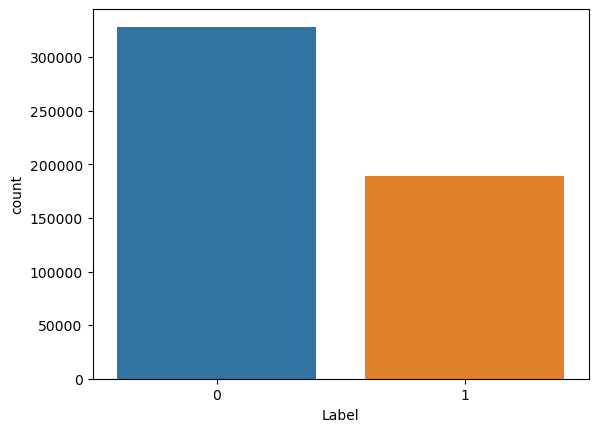

In [9]:
sns.countplot(data=train_out, x='Label')

<AxesSubplot: xlabel='ClmProcedureCode_1', ylabel='count'>

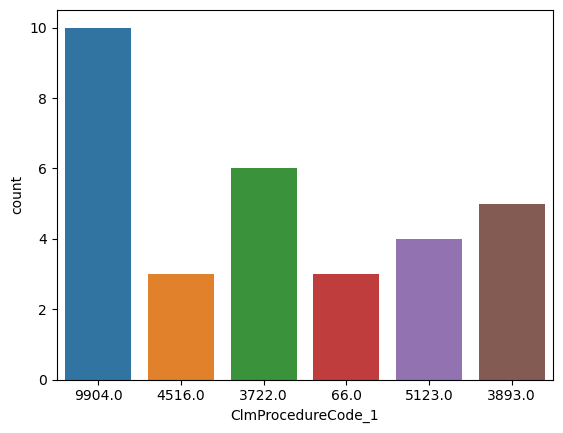

In [10]:
sns.countplot(x='ClmProcedureCode_1', data=train_out[train_out['Label']==0], order=train_out['ClmProcedureCode_1'].value_counts().index[:6])
#sns.histplot(data=train_out[train_out['Label']==0], x='OPAnnualReimbursementAmt')

<AxesSubplot: xlabel='ClmProcedureCode_1', ylabel='count'>

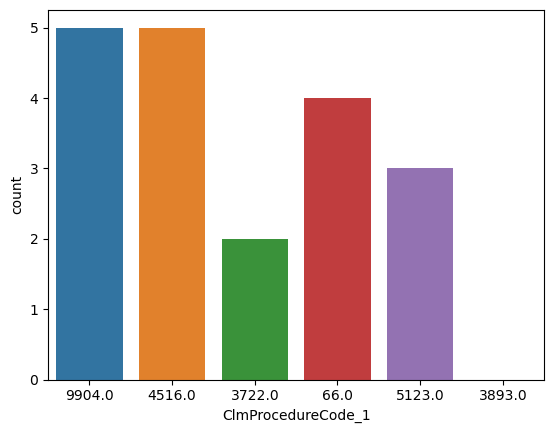

In [11]:
sns.countplot(x='ClmProcedureCode_1', data=train_out[train_out['Label']==1], order=train_out['ClmProcedureCode_1'].value_counts().index[:6])


<AxesSubplot: xlabel='ClmProcedureCode_1', ylabel='count'>

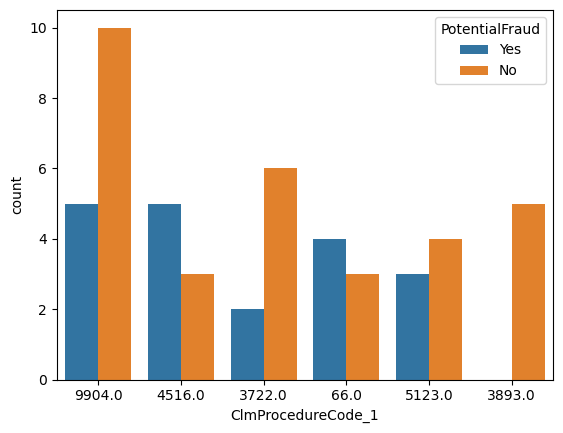

In [12]:
sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=train_out, order=train_out['ClmProcedureCode_1'].value_counts().index[:6])
#9904 - transfusion of packed cells
#4516 - EGD

(array([3., 3., 1.]),
 array([  20.        , 1113.33333333, 2206.66666667, 3300.        ]),
 <BarContainer object of 3 artists>)

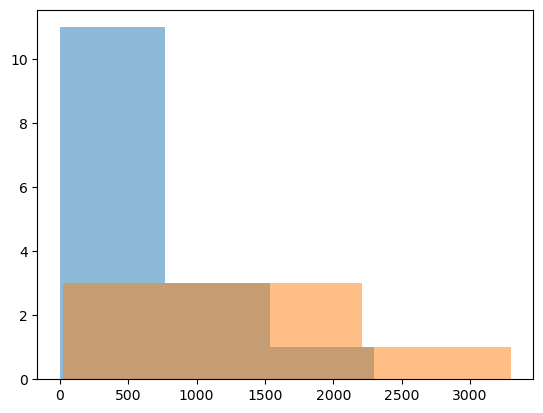

In [13]:
# examine data for 9904 and 4516, compare those with relatively higher potential fraud and vice versa
plt.hist(train_out[train_out['ClmProcedureCode_1']==9904]['InscClaimAmtReimbursed'], bins = 3, alpha=0.5)
plt.hist(train_out[train_out['ClmProcedureCode_1']==66]['InscClaimAmtReimbursed'], bins = 3, alpha=0.5)

In [14]:
train_out.groupby('Provider').agg(sum)['Label'].sort_values(ascending=False)

/tmp/ipykernel_385/997750487.py:1: FutureWarning: The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  train_out.groupby('Provider').agg(sum)['Label'].sort_values(ascending=False)


Provider
PRV51459    8240
PRV53797    4739
PRV51574    4444
PRV53918    3588
PRV54895    3433
            ... 
PRV53346       0
PRV53344       0
PRV53343       0
PRV53342       0
PRV57763       0
Name: Label, Length: 5012, dtype: int64

In [15]:
train_out[train_out['Provider']=='PRV51459']['ClmDiagnosisCode_1'].value_counts()

4019     220
4011     193
2721      63
2724      51
2722      48
        ... 
61804      1
79439      1
3577       1
3488       1
5600       1
Name: ClmDiagnosisCode_1, Length: 3070, dtype: int64

In [16]:
train_out[train_out['Provider']=='PRV53344']['ClmDiagnosisCode_1'].value_counts()

5163     1
38634    1
Name: ClmDiagnosisCode_1, dtype: int64

In [17]:
train_out[train_out['Provider']=='PRV51459'].groupby('AttendingPhysician').agg('count')['BeneID']

AttendingPhysician
PHY314027    1200
PHY327046    1181
PHY337425    1156
PHY338032    1158
PHY341578    1133
PHY357120    1156
PHY423534    1223
Name: BeneID, dtype: int64

In [18]:
train_out[train_out['Provider']=='PRV51459'].groupby('OperatingPhysician').agg('count')['BeneID']

OperatingPhysician
PHY314027    256
PHY327046    236
PHY337425    226
PHY341578    224
PHY357120    249
PHY423534    250
Name: BeneID, dtype: int64

In [19]:
train_out[train_out['AttendingPhysician']=='PHY314027']['Provider'].unique()

array(['PRV51459'], dtype=object)

<AxesSubplot: xlabel='ChronicCond_Diabetes', ylabel='count'>

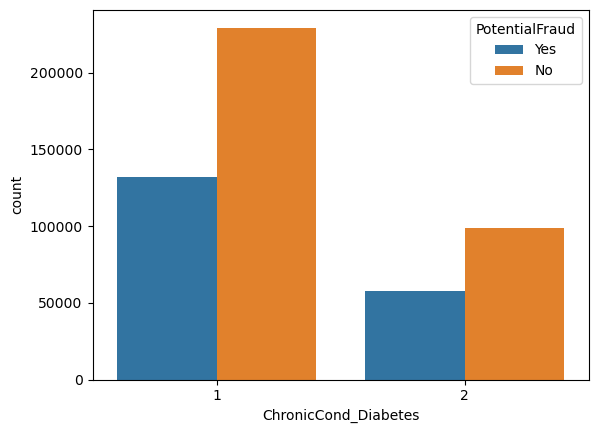

In [20]:
sns.countplot(x='ChronicCond_Diabetes',hue='PotentialFraud',data=train_out)



In [21]:
# examine other providers who give the same diagnoses codes and PRV51459 (diag 4019)
out_4019 = train_out.loc[train_out['ClmDiagnosisCode_1'] == '4019']
out_4019['Provider'].value_counts()[:5]

PRV51459    220
PRV53797    139
PRV51574    120
PRV55215     89
PRV54895     86
Name: Provider, dtype: int64

In [22]:
train_label.loc[train_label['Provider']=='PRV53797']


,Provider,PotentialFraud
2250,PRV53797,Yes


In [23]:
train_label.loc[train_label['Provider']=='PRV51574']


,Provider,PotentialFraud
455,PRV51574,Yes


In [24]:
train_label.loc[train_label['Provider']=='PRV55215']

,Provider,PotentialFraud
3363,PRV55215,Yes


(array([1.3535e+04, 1.6600e+02, 4.6000e+01, 2.3000e+01, 1.4000e+01,
        8.0000e+00, 1.0000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0.,  502., 1004., 1506., 2008., 2510., 3012., 3514., 4016.,
        4518., 5020.]),
 <BarContainer object of 10 artists>)

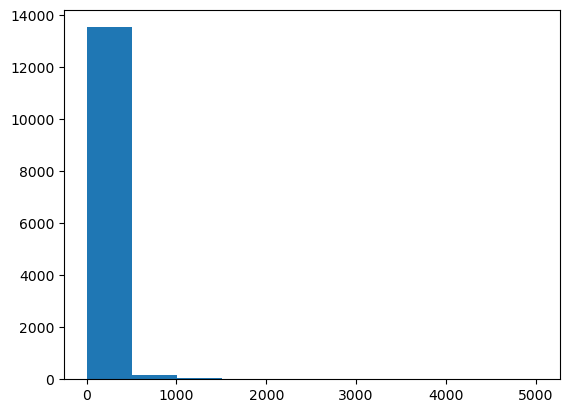

In [25]:
plt.hist(out_4019['InscClaimAmtReimbursed'])

(array([220.,  31.,  11.,   2.,   1.,   1.,   1.,   0.,   0.,   1.]),
 array([   0.,  330.,  660.,  990., 1320., 1650., 1980., 2310., 2640.,
        2970., 3300.]),
 <BarContainer object of 10 artists>)

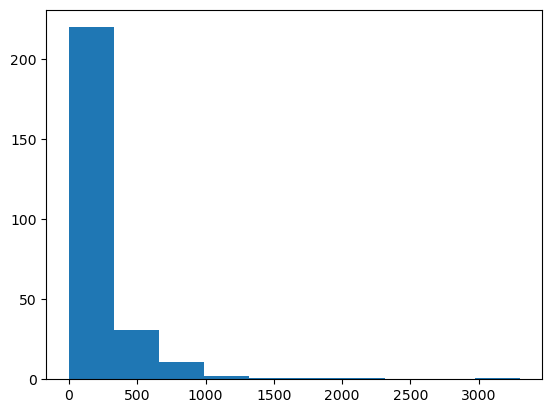

In [26]:
out_5163 = train_out.loc[train_out['ClmDiagnosisCode_1'] == '5163']
plt.hist(out_5163['InscClaimAmtReimbursed'])

# Preprocessing on full_train

In [27]:
full_train.isnull().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10                553201
ClmProcedureCode_1                 534901
ClmProcedureCode_2                 552721
ClmProcedureCode_3                 557242
ClmProcedureCode_4                 558093
ClmProcedureCode_5                

In [28]:
full_train['AdmissionDt'] = pd.to_datetime(full_train['AdmissionDt'])  
full_train['DischargeDt'] = pd.to_datetime(full_train['DischargeDt'])  
full_train['DOB'] = pd.to_datetime(full_train['DOB'])  
full_train['DOD'] = pd.to_datetime(full_train['DOD'])  

In [29]:
full_train['StayDuration'] = (full_train['DischargeDt'] - full_train['AdmissionDt']).dt.days
full_train['StayDuration'].fillna(0.0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
40469    7.0
40470    7.0
40471    8.0
40472    0.0
40473    7.0
Name: StayDuration, Length: 558211, dtype: float64

In [30]:
#clm_diag_code_oh = pd.get_dummies(full_train['ClmDiagnosisCode_1'], drop_first=True)
#clm_proc_code_oh = pd.get_dummies(full_train['ClmProcedureCode_1'], drop_first=True)
#full_train = full_train.join(clm_diag_code_oh)
#full_train = full_train.join(clm_proc_code_oh)

In [31]:
today = datetime(2022, 1, 1)
full_train['DOD'].fillna(today)
full_train['Age'] = ((today - full_train['DOB']).dt.days)/365

In [32]:
full_train = full_train.drop_duplicates()

# General EDA

<AxesSubplot: xlabel='IPAnnualReimbursementAmt', ylabel='Count'>

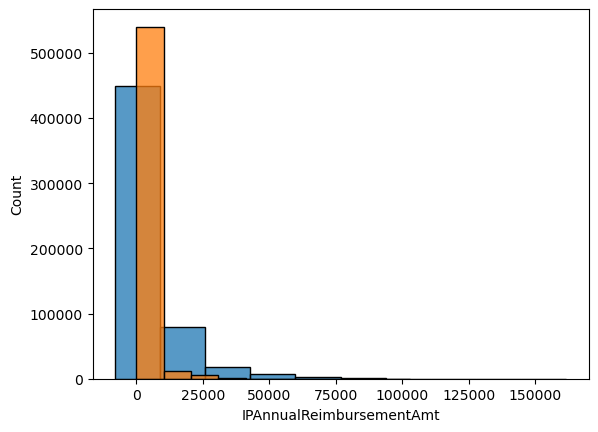

In [33]:
# insurance distributions
# inpatient vs outpatient 
sns.histplot(data = full_train, x='IPAnnualReimbursementAmt', bins=10)
sns.histplot(data = full_train, x='OPAnnualReimbursementAmt', bins=10)

<AxesSubplot: xlabel='IPAnnualDeductibleAmt', ylabel='Count'>

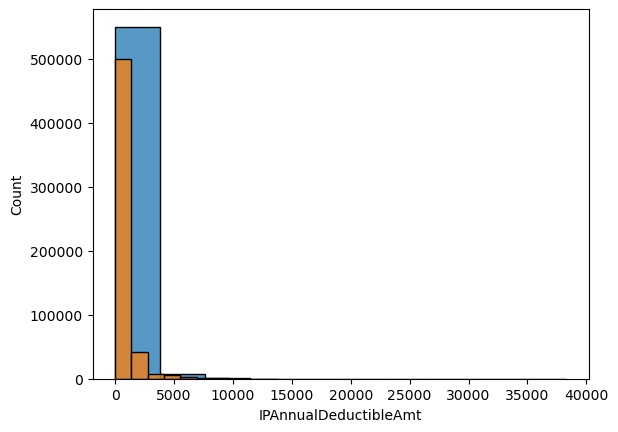

In [34]:
# deductible distributions
# inpatient vs outpatient 
sns.histplot(data = full_train, x='IPAnnualDeductibleAmt', bins=10)
sns.histplot(data = full_train, x='OPAnnualDeductibleAmt', bins=10)

<AxesSubplot: xlabel='Label', ylabel='count'>

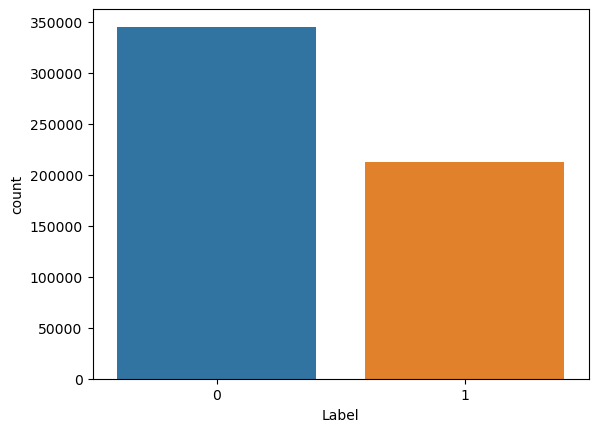

In [35]:
sns.countplot(data=full_train, x='Label')

<AxesSubplot: xlabel='Age', ylabel='Count'>

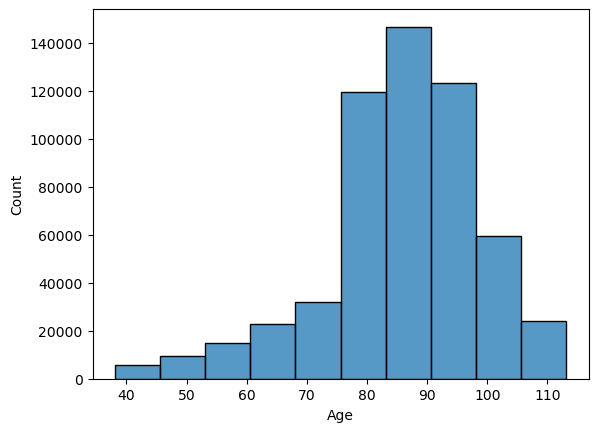

In [36]:
sns.histplot(data = full_train, x='Age', bins=10)

<AxesSubplot: xlabel='StayDuration', ylabel='Count'>

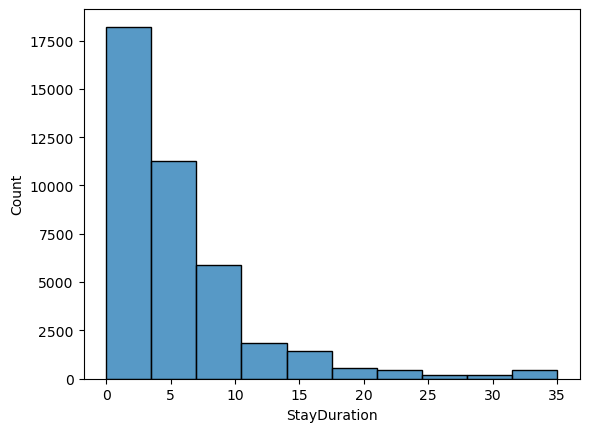

In [37]:
sns.histplot(data = full_train[full_train['Outpatient']==0], x='StayDuration', bins=10)

# EDA for Fraud Patterns

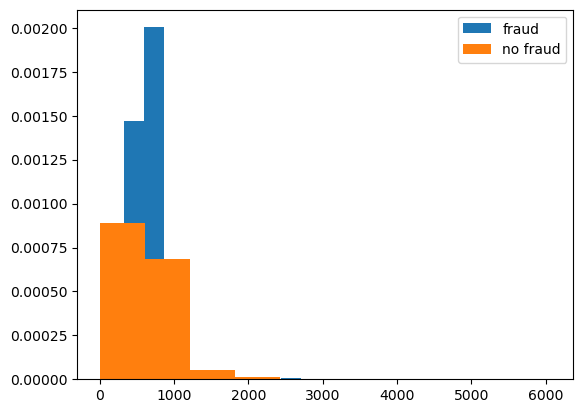

In [38]:
out_data = full_train[full_train['Outpatient']==1]
in_data = full_train[full_train['Outpatient']==0]
fraud_data = full_train[full_train['Label']==1]
nonfraud_data =full_train[full_train['Label']==0]

plt.hist(fraud_data.groupby('Provider').agg('mean', numeric_only=True)['OPAnnualDeductibleAmt'], density=True, bins=10, label='fraud');
plt.hist(nonfraud_data.groupby('Provider').agg('mean', numeric_only=True)['OPAnnualDeductibleAmt'], density=True, bins=10, label='no fraud');
plt.legend();

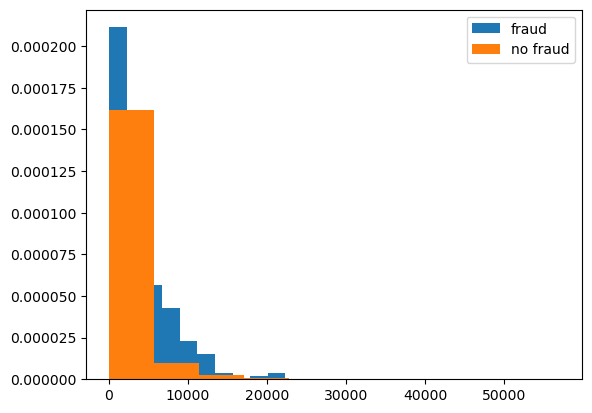

In [39]:
plt.hist(fraud_data.groupby('Provider').agg('mean', numeric_only=True)['InscClaimAmtReimbursed'], density=True, bins=10, label='fraud');
plt.hist(nonfraud_data.groupby('Provider').agg('mean', numeric_only=True)['InscClaimAmtReimbursed'], density=True, bins=10, label='no fraud');
plt.legend();

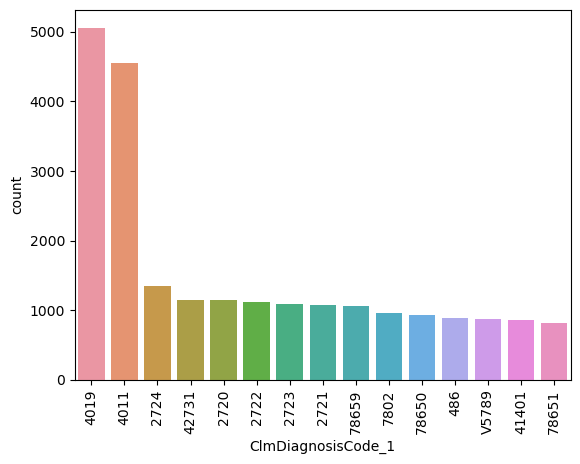

In [40]:
sns.countplot(x='ClmDiagnosisCode_1', data=fraud_data, 
                      order=fraud_data['ClmDiagnosisCode_1'].value_counts().index[:15])
plt.xticks(rotation=90);

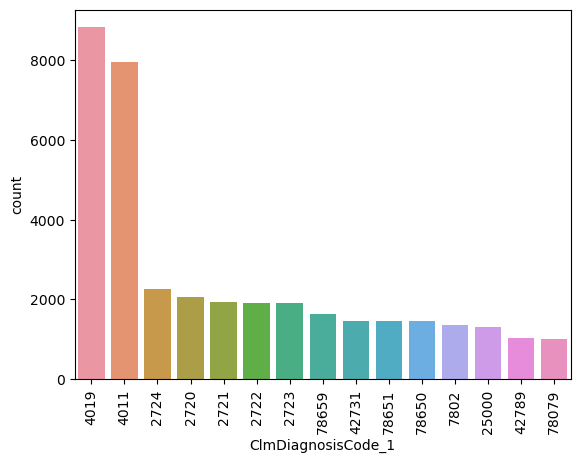

In [41]:
sns.countplot(x='ClmDiagnosisCode_1', data=nonfraud_data, 
                      order=nonfraud_data['ClmDiagnosisCode_1'].value_counts().index[:15])
plt.xticks(rotation=90);

In [42]:
nonfraud_data.groupby(['Provider', 'ClmProcedureCode_1']).agg('count')['BeneID'].max()

5

In [43]:
prov_clm = nonfraud_data.groupby(['Provider', 'ClmProcedureCode_1']).agg('count')
prov_clm[prov_clm['BeneID']==5]

,,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Label,Outpatient,AdmissionDt,DischargeDt,DiagnosisGroupCode,StayDuration,Age
Provider,ClmProcedureCode_1,,,,,,,,,,,,,,,,,,,,,
PRV51456,3893.0,5,5,5,5,5,5,5,0,5,5,...,5,5,5,5,5,5,5,5,5,5
PRV52003,3893.0,5,5,5,5,5,5,5,0,5,5,...,5,5,5,5,5,5,5,5,5,5
PRV54244,3893.0,5,5,5,5,5,5,5,0,5,5,...,5,5,5,5,5,5,5,5,5,5
PRV55916,9904.0,5,5,5,5,5,5,5,2,5,5,...,5,5,5,5,5,5,5,5,5,5


In [44]:
fraud_data.groupby(['Provider', 'ClmProcedureCode_1']).agg('count')['BeneID'].max()

17

In [45]:
prov_clm = fraud_data.groupby(['Provider', 'ClmProcedureCode_1']).agg('count')
prov_clm[prov_clm['BeneID']==17]

,,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Label,Outpatient,AdmissionDt,DischargeDt,DiagnosisGroupCode,StayDuration,Age
Provider,ClmProcedureCode_1,,,,,,,,,,,,,,,,,,,,,
PRV54367,9904.0,17,17,17,17,17,17,17,0,17,17,...,17,17,17,17,17,17,17,17,17,17


# Select Features

In [46]:
full_train.columns
full_train = full_train.fillna(0)

In [6]:
columns = ['InscClaimAmtReimbursed','ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode','Gender', 'Race',
       'RenalDiseaseIndicator', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
           'Outpatient','DiagnosisGroupCode', 'StayDuration', 'Age']

In [48]:
full_train[columns]

,InscClaimAmtReimbursed,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Outpatient,DiagnosisGroupCode,StayDuration,Age
0,30,78943,V5866,V1272,0,0,0,0,0,0,...,2,2,0,0,30,50,1,0,0.0,85.391781
1,40,71988,0,0,0,0,0,0,0,0,...,1,2,0,0,1810,760,1,0,0.0,99.572603
2,200,82382,30000,72887,4280,7197,V4577,0,0,0,...,1,2,0,0,1810,760,1,0,0.0,99.572603
3,20,20381,0,0,0,0,0,0,0,0,...,1,2,0,0,1810,760,1,0,0.0,99.572603
4,40,V6546,4280,2449,V854,0,0,0,0,0,...,1,2,0,0,1810,760,1,0,0.0,99.572603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,12000,78079,45341,V1251,41401,2449,2930,78830,1985,0414,...,1,1,20000,2136,740,320,0,940,7.0,69.884932
40470,5000,486,7905,V5867,5990,2859,7904,49121,41401,2639,...,2,1,5000,1068,2670,360,0,190,7.0,78.893151
40471,14000,42821,E9342,42731,5856,4280,5859,51881,V0481,2761,...,1,2,26790,2136,70,0,0,308,8.0,82.142466
40472,10000,41071,78552,5856,V4581,5789,39891,40390,2866,0,...,2,2,10300,1068,5390,1730,0,238,0.0,64.210959


In [3]:
full_train = pd.read_csv('data/full_train.csv')

/tmp/ipykernel_411/1231026081.py:1: DtypeWarning: Columns (55,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  full_train = pd.read_csv('data/full_train.csv')


In [12]:
# simple SLR 
columns = ['InscClaimAmtReimbursed','Gender', 'Race',
       'RenalDiseaseIndicator', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
           'Outpatient', 'StayDuration', 'Age']
full_train[columns]['RenalDiseaseIndicator']

0         0
1         0
2         0
3         0
4         0
         ..
558206    Y
558207    Y
558208    Y
558209    Y
558210    0
Name: RenalDiseaseIndicator, Length: 558211, dtype: object

In [13]:
full_train.loc[ full_train['RenalDiseaseIndicator'] == 'Y', 'RenalDiseaseIndicator'] = 1
full_train.loc[ full_train['RenalDiseaseIndicator'] == '0', 'RenalDiseaseIndicator'] = 1


In [14]:
X = full_train[columns]
y = full_train['Label']
print(X.shape)
print(y.shape)

(558211, 24)
(558211,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)
logreg_preds = logreg.predict(X_train)
#clf.score(X, y)

In [17]:
# base accuracy score
logreg.score(X_train, y_train)

0.6228165165333782

In [18]:
precision_recall_fscore_support(y_train, logreg_preds, average='macro')

(0.6016074160694629, 0.5093990012803659, 0.4139757756230674, None)

# SMOTE sample in-patients

In [20]:
!pip install imbalanced-learn
import imblearn

  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)


In [41]:
nonfraud_data[nonfraud_data['BeneID']=='BENE11002']

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Label,Outpatient,AdmissionDt,DischargeDt,DiagnosisGroupCode,StayDuration,Age


In [103]:
fraud_data

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Label,Outpatient,AdmissionDt,DischargeDt,DiagnosisGroupCode,StayDuration,Age
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,30,50,Yes,1,1,NaT,NaT,NaN,NaN,85.391781
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1810,760,Yes,1,1,NaT,NaT,NaN,NaN,99.572603
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1810,760,Yes,1,1,NaT,NaT,NaN,NaN,99.572603
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1810,760,Yes,1,1,NaT,NaT,NaN,NaN,99.572603
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1810,760,Yes,1,1,NaT,NaT,NaN,NaN,99.572603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40215,BENE142565,CLM37075,2009-02-05,2009-02-09,PRV55514,18000,PHY380221,PHY392672,NaN,71596,...,0,0,Yes,1,0,2009-02-05,2009-02-09,489,4.0,78.726027
40312,BENE105735,CLM52218,2009-05-22,2009-05-30,PRV56566,12000,PHY344703,PHY344703,NaN,51881,...,740,230,Yes,1,0,2009-05-22,2009-05-30,163,8.0,92.315068
40423,BENE135136,CLM60037,2009-07-17,2009-07-19,PRV55852,5000,PHY336944,NaN,NaN,486,...,1500,400,Yes,1,0,2009-07-17,2009-07-19,198,2.0,99.821918
40424,BENE135136,CLM70804,2009-10-05,2009-10-11,PRV55852,5000,PHY356585,PHY356585,NaN,53019,...,1500,400,Yes,1,0,2009-10-05,2009-10-11,379,6.0,99.821918
